In [1]:
# Adding required library with required names
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path
import math

In [2]:
# adding the cartesian and polar coordinate converter
# these functions take or give 'radians'
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [3]:
def OverAll_Map(Scan_Coordinates,Self_Localization, Heading): 
    # Taking array of measurement data in shape of polar cooradinates 
    #Scan is and Self_Localization in mm, Theta and Heading in Degree
    
    Scan_x= Scan_Coordinates[0, :]
    Scan_y= Scan_Coordinates[1, :]
    # taking x and y coordinates
    
    
    Self_x= Self_Position[0]* np.ones((1,len(Scan_x)))
    Self_y= Self_Position[1]* np.ones((1,len(Scan_y)))
    
    Map_x=Scan_x+Self_x
    Map_y=Scan_y+Self_y
    # Adding Self_Position for mapping
    
    Map_Radius= np.zeros((1,len(Scan_x)))
    Map_The= np.zeros((1,len(Scan_x)))

    for i in range(len(Scan_x)):
        Map_Radius[0][i], Map_The[0][i]= cart2pol(Map_x[0][i],Map_y[0][i])
        # Converting polar coordinates
    
    
    #the= np.linspace(1,2,1000)
    #Map_Radius= np.interp(the, Map_The,Map_Radius)
    
    Heading = math.radians(Heading)
    Map_Theta= Map_The+ Heading* np.ones((1,len(Map_The)))
    #Map_Theta= the+ Heading* np.ones((1,len(the)))
    
    # Adding Heading angle to measurement angle
    

    print(np.size(Map_Radius))
        
    for i in range(np.size(Map_Radius)):
        
        # The only RED is 1 for the Radius for obstacle
          
        x,y=pol2cart(Map_Radius[0][i],Map_Theta[0][i])
        #print(x)
        #print(Map_Radius[0][i])
        x=int(x)
        y=int(y)
        All_Map[x, y,0]=1
        All_Map[x, y,1]=0
        All_Map[x, y,2]=0
        
        for j in range(int(Map_Radius[0][i])):
            
            # Until the radius, all of data are 1 for free space
            x, y=pol2cart(j,Map_Theta[0][i])
            x=int(x)
            y=int(y)
            All_Map[x, y,0]=1
            All_Map[x, y,1]=1
            All_Map[x, y,2]=1
              

In [4]:
# Defining Global variables
Map_Size=2500 # Each pixels has 1mm^2 area for the over all map
All_Map=np.zeros((Map_Size,Map_Size,3)) 
     #It is the map as 3 dimension like RGB
     # RGB= 111 means that scanned and defined as blank
     # RGB=100 means that scanned and defined as obstacle
     # RGB= 000 means that not scanned
Mapping_Number=1



In [5]:
while Mapping_Number < 5:
    Coordinate_Meas= 'Coordinate_Meas_'+ str(Mapping_Number)
    Self_Localization='Self_Localization_Meas_'+ str(Mapping_Number)
    Heading_Meas = 'Heading_Meas_' + str (Mapping_Number)

    if os.path.isfile(Coordinate_Meas):
        #control the scanning data is there while
        my_scan = genfromtxt(Coordinate_Meas, delimiter=',')
        Self_Position = genfromtxt(Self_Localization, delimiter=',')
        Heading = genfromtxt(Heading_Meas, delimiter=',')

        OverAll_Map(my_scan,Self_Position, Heading)
        #print(Mapping_Number)
        Mapping_Number= Mapping_Number+1
        
    else :
        continue
       

    
    
    
    


70
70
70
70


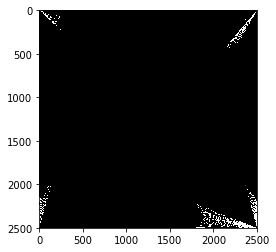

In [6]:
plt.imshow(All_Map)